<a href="https://colab.research.google.com/github/J-o-y-y/ms_ai_school/blob/main/20230626_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_%EC%A7%84%ED%96%89_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 공개되어 있는 데이터를 가지고 로지스틱 회귀 진행 실습

- 각 이미지 크기는 28 x 28 / 흑백 이미지 / 총 10개의 클래스

In [13]:
"""
Fashion-MNIST 라벨 구성 요소
0 - 티셔츠
1 - 바지
2 - 스웨터
3 - 드레스
4 - 코트
5 - 샌들
6 - 셔츠
7 - 운동화
8 - 가방
9 - 앵글 부츠
"""

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# 데이터셋 다운로드 하고 Dataloader 생성하기

In [16]:
import torchvision.datasets as dataset

In [19]:
# 데이터셋 다운로드 및 Dataloader 생성
train_dataset = dataset.FashionMNIST(root="./data", train=True, transform=transforms.ToTensor(),download=True)
test_dataset = dataset.FashionMNIST(root="./data", train=False, transform=transforms.ToTensor(),download=False)

100%|██████████| 26421880/26421880 [00:02<00:00, 11752384.03it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200497.02it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3714629.69it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5527976.70it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [21]:
# train Loader test Loader 설정
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = 1, shuffle=False)

In [ ]:
# 모델 정의

In [22]:
class LogisticRegression(nn.Module) :
    def __init__(self, input_size, num_classes) :
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x) :
        out = self.linear(x)
        return out

In [ ]:
# 하이퍼 파라미터 설정

In [23]:
input_size = 28 * 28
num_classes = 10
num_epochs = 10
lr = 0.001

total_step = len(train_loader)

In [ ]:
# 모델, Loss, 옵티마이저 정의

In [24]:
model = LogisticRegression(input_size=input_size, num_classes=num_classes)
# print(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# device setting
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using Device >>" , device)

model.to(device)

Using Device >> cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# train loop

Epoch [1/10], Step [100/600], Loss : 1.2935, Train ACC : 0.6800
Epoch [1/10], Step [200/600], Loss : 1.0668, Train ACC : 0.6850
Epoch [1/10], Step [300/600], Loss : 0.8613, Train ACC : 0.6900
Epoch [1/10], Step [400/600], Loss : 0.8871, Train ACC : 0.6900
Epoch [1/10], Step [500/600], Loss : 0.8103, Train ACC : 0.7020
Epoch [1/10], Step [600/600], Loss : 0.7662, Train ACC : 0.7133
Epoch [2/10], Step [100/600], Loss : 0.7937, Train ACC : 0.7000
Epoch [2/10], Step [200/600], Loss : 0.7377, Train ACC : 0.7350
Epoch [2/10], Step [300/600], Loss : 0.8056, Train ACC : 0.7400
Epoch [2/10], Step [400/600], Loss : 0.6505, Train ACC : 0.7700
Epoch [2/10], Step [500/600], Loss : 0.7249, Train ACC : 0.7620
Epoch [2/10], Step [600/600], Loss : 0.6343, Train ACC : 0.7633
Epoch [3/10], Step [100/600], Loss : 0.6061, Train ACC : 0.8300
Epoch [3/10], Step [200/600], Loss : 0.6140, Train ACC : 0.8100
Epoch [3/10], Step [300/600], Loss : 0.6408, Train ACC : 0.8267
Epoch [3/10], Step [400/600], Loss : 0.5

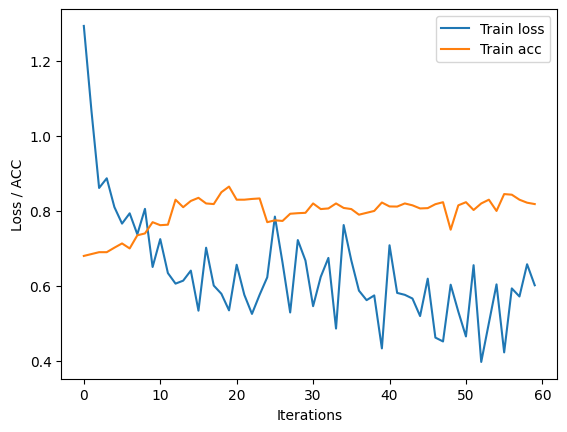

In [25]:
loss_list = []
acc_list = []

for epoch in range(num_epochs) :
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader) :
        # 데이터 로드
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # 순전파 및 Loss 계산
        ouptuts = model(images)
        loss = criterion(ouptuts, labels)

        # 역전파 및 가중치 업데이트
        loss.backward()
        optimizer.step()

        # 로그 출력
        if (i+1) % 100 == 0 :
            loss_list.append(loss.item())
            _, predicted = torch.max(ouptuts.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)

            print("Epoch [{}/{}], Step [{}/{}], Loss : {:.4f}, Train ACC : {:.4f}".format(
                epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))


# 손실 및 정확도 그래프 출력
plt.plot(loss_list, label="Train loss")
plt.plot(acc_list, label="Train acc")
plt.xlabel('Iterations')
plt.ylabel('Loss / ACC')
plt.legend()
plt.show()